In [2]:
%%capture
%pip install -U 'rockfish[labs]' -f 'https://docs142.rockfish.ai/packages/index.html'

In [4]:
import pandas as pd
import random

import rockfish as rf
import rockfish.labs

In [5]:
# create a timeseries dataset
def generate_timeseries_data(num_rows, rng):
    metadata = rng.choices(["A", "B", "C", "D","E"], weights=[1, 1, 2, 2, 1], k=num_rows)
    timestamp = pd.date_range(start="1/1/2020", periods=num_rows, freq="D")
    numerical_col = [rng.uniform(1, 100) for _ in range(num_rows)]
    categorical_col = rng.choices(["a", "b", "c"], weights=[1, 1, 2], k=num_rows)

    data = {
        "metadata_field": metadata,
        "timestamp_field": timestamp,
        "numerical_field": numerical_col,
        "categorical_field": categorical_col,
    }

    return pd.DataFrame(data)

rng = random.Random(42)
ts_data = rf.Dataset.from_pandas("sample1", generate_timeseries_data(10_000, rng))
ts_syn = rf.Dataset.from_pandas("sample2", generate_timeseries_data(10_000, rng))

In [6]:
# need to specify the metadata field and add that schema to each dataset to help compute session_length and interarrivals
metadata_fields = ["metadata_field"]
schema_metadata = rf.arrow.SchemaMetadata(metadata=metadata_fields)
ts_data.table = rf.arrow.replace_schema_metadata(
    ts_data.table, schema_metadata
)
ts_syn.table = rf.arrow.replace_schema_metadata(ts_syn.table, schema_metadata)

Session_length distribution

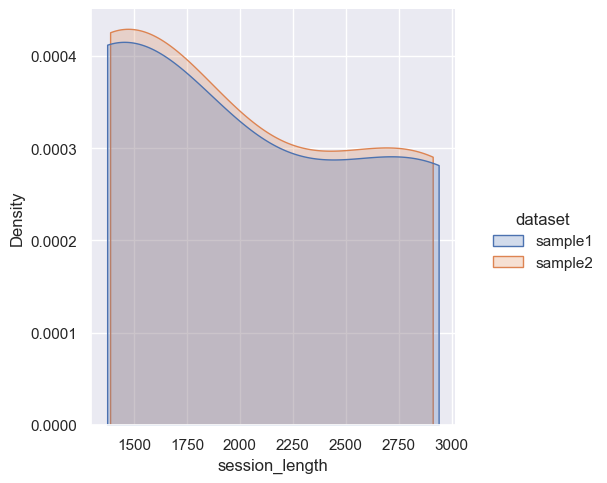

In [7]:
# compute session_length
source_sess = rf.metrics.session_length(ts_data)
syn_sess = rf.metrics.session_length(ts_syn)
# visualize the computed results in kde
rf.labs.vis.plot_kde([source_sess, syn_sess], "session_length")

Interarrival distribution

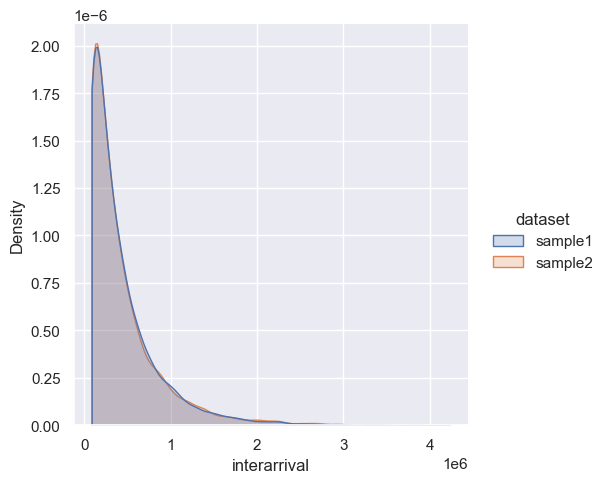

In [9]:
# compute session_length
timestamp_field = "timestamp_field"
source_interarrival = rf.metrics.interarrivals(ts_data, timestamp_field)
syn_interarrival = rf.metrics.interarrivals(ts_syn, timestamp_field)
# visualize the computed results in kde
rf.labs.vis.plot_kde(
    [source_interarrival, syn_interarrival], "interarrival", duration_unit="s"
)

Bar chart for a categorical field

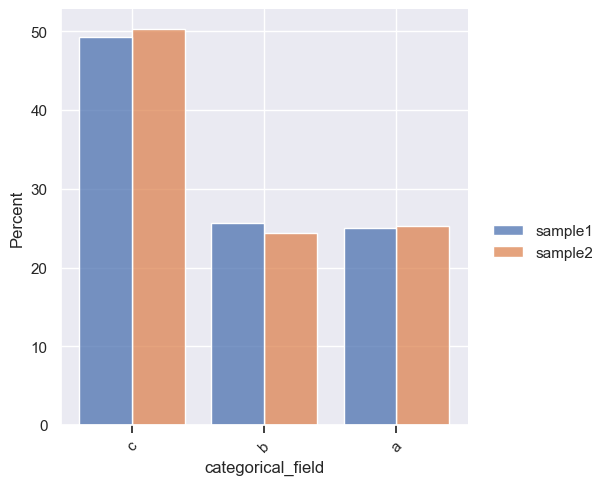

In [11]:
# use count_all to compute the number of unique values
d1_discrete_agg = rf.metrics.count_all(ts_data, "categorical_field", nlargest = 10)
d2_discrete_agg = rf.metrics.count_all(ts_syn, "categorical_field", nlargest = 10)
# visualize the computed result in bar chart
rf.labs.vis.plot_bar(
    [d1_discrete_agg, d2_discrete_agg], "categorical_field", "categorical_field_count")